In [ ]:
!wget -N 'https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/spiders.tar.gz'
import tarfile
file = tarfile.open('spiders.tar.gz')
file.extractall('./')
file.close()


--2022-06-05 08:21:31--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/spiders.tar.gz
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.12
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10012354 (9.5M) [application/x-tar]
Saving to: ‘spiders.tar.gz’

spiders.tar.gz      100%[===================>]   9.55M  3.96MB/s    in 2.4s    

2022-06-05 08:21:35 (3.96 MB/s) - ‘spiders.tar.gz’ saved [10012354/10012354]



In [ ]:
%cd /content/spiders
!find .ipynb_checkpoints
!rm  -r .ipynb_checkpoints

In [ ]:
!pip install -q tflite-model-maker


     |████████████████████████████████| 642 kB 9.0 MB/s 
     |████████████████████████████████| 120 kB 25.1 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 58.7 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 10.9 MB 24.6 MB/s 
     |████████████████████████████████| 87 kB 8.4 MB/s 
     |████████████████████████████████| 3.4 MB 50.3 MB/s 
     |████████████████████████████████| 237 kB 74.3 MB/s 
     |████████████████████████████████| 1.2 MB 33.8 MB/s 
     |████████████████████████████████| 840 kB 69.0 MB/s 
     |████████████████████████████████| 6.4 MB 37.8 MB/s 
     |████████████████████████████████| 1.1 MB 54.7 MB/s 
     |████████████████████████████████| 25.3 MB 84.5 MB/s 
     |████████████████████████████████| 99 kB 11.0 MB/s 
     |████████████████████████████████| 352 kB 71.0 MB/s 
     |████████████████████████████████| 47.8 MB 1.7 MB/s 
     |████████████

In [ ]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt

In [ ]:
image_path='/content/spiders/train'
data = DataLoader.from_folder(image_path)


INFO:tensorflow:Load image with size: 366, num_label: 2, labels: Bold Jumper, Yellow Garden Spider.


In [ ]:
#model = image_classifier.create(train_data)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)


INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


9/9 [==============================] - 14s 187ms/step - loss: 0.3984 - accuracy: 0.9236 - val_loss: 0.2522 - val_accuracy: 1.0000
Epoch 2/10
9/9 [==============================] - 1s 125ms/step - loss: 0.2267 - accuracy: 0.9965 - val_loss: 0.2223 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 1s 107ms/step - loss: 0.2296 - accuracy: 1.0000 - val_loss: 0.2269 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 1s 116ms/step - loss: 0.2307 - accuracy: 1.0000 - val_loss: 0.2224 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 1s 109ms/step - loss: 0.2222 - accuracy: 1.0000 - val_loss: 0.2162 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 1s 110ms/step - loss: 0.2146 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 1s 109ms/step - loss: 0.2139 - accuracy: 1.0000 - val_loss: 0.2149 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==============

In [ ]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 0s 18ms/step - loss: 0.2099 - accuracy: 1.0000


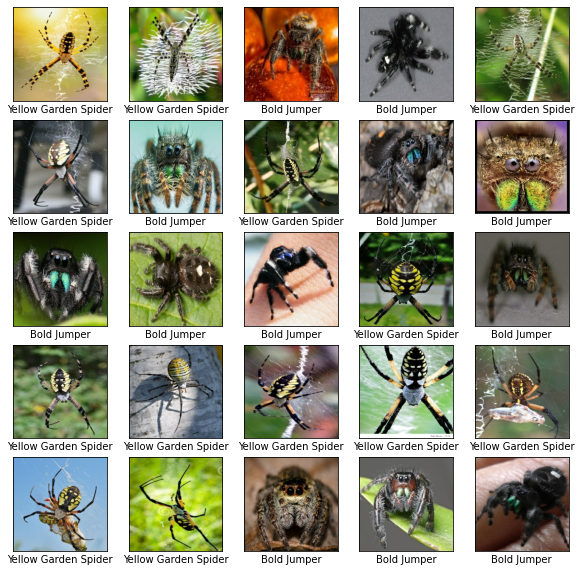

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

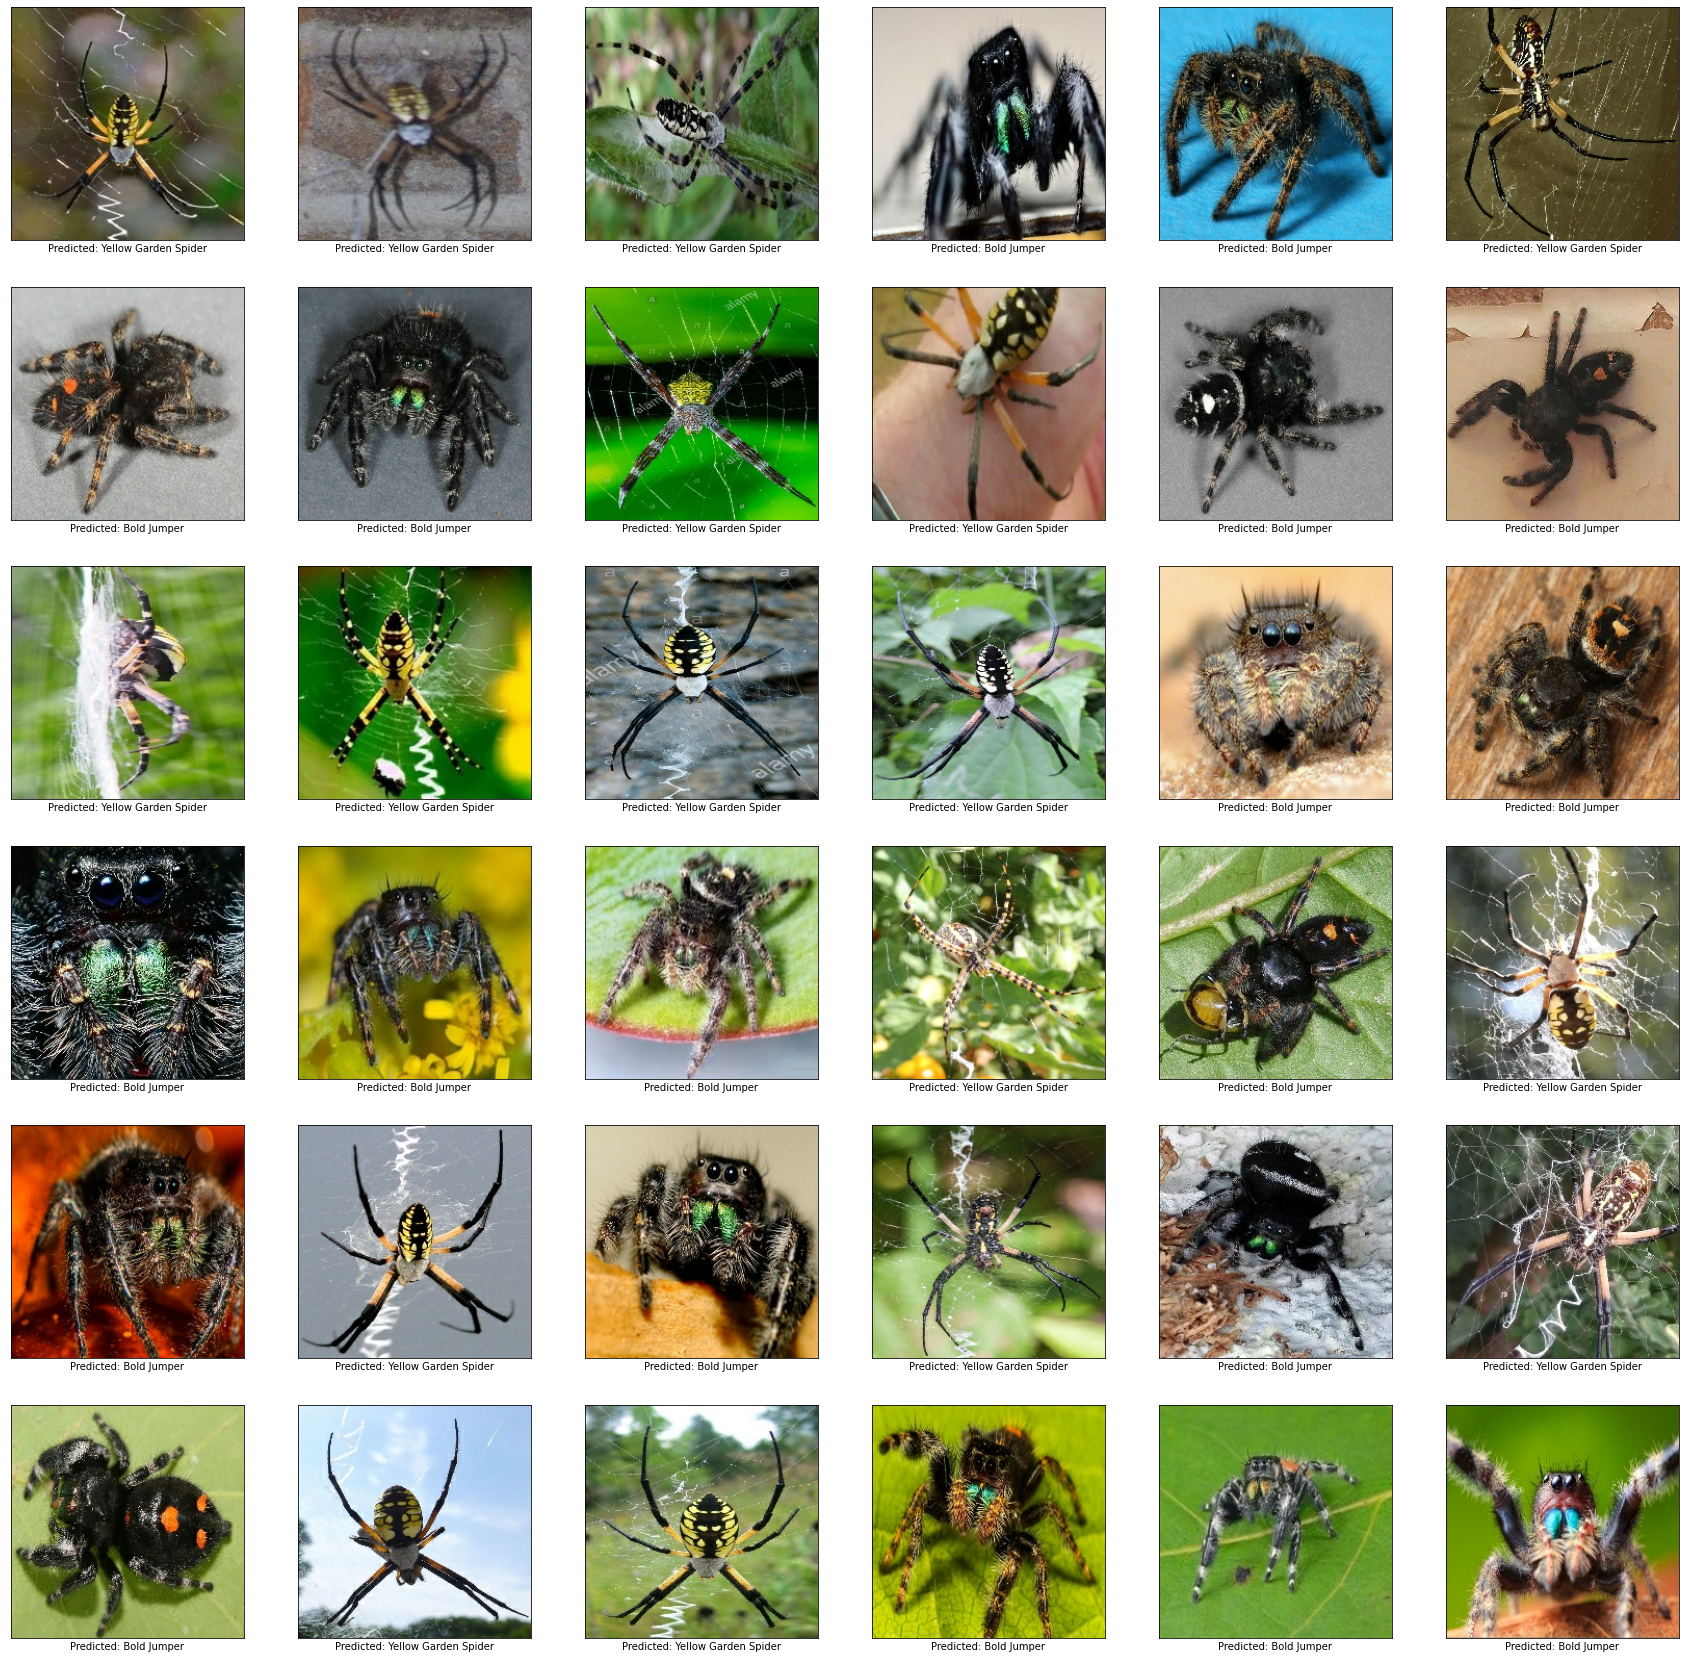

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(36)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/model16', export_format=ExportFormat.LABEL)
config = QuantizationConfig.for_float16()
model.export(export_dir='/content/model16', tflite_filename='model_spider.tflite', quantization_config=config)

INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Saving labels in /content/model16/labels.txt


INFO:tensorflow:Assets written to: /tmp/tmpem9qrqk3/assets


INFO:tensorflow:Assets written to: /tmp/tmpem9qrqk3/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpd7_qnbcs/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpd7_qnbcs/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_spider.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/model16/model_spider.tflite
